In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from census import Census
from sklearn import (
    compose,
    metrics,
    model_selection,
    neural_network,
    pipeline,
    preprocessing,
)

In [2]:
def census_data(year, c=Census("23c580dcbb047d99e93502f60681fc6430f2fc9a")):
    return pd.DataFrame(
        c.acs5.state_county(
            ("NAME", "B01002_001E", "B01003_001E", "B19013_001E"),
            Census.ALL,
            Census.ALL,
            year=year,
        )
    )


c_09 = census_data(2009)
c_09["year"] = 2008
c_12 = census_data(2012)
c_12["year"] = 2012
c_16 = census_data(2016)
c_16["year"] = 2016
c_20 = census_data(2020)
c_20["year"] = 2020
c_23 = census_data(2023)
c_23["year"] = 2024

/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
c_df = pd.concat((c_09, c_12, c_16, c_20, c_23))
c_df = c_df.rename(
    columns={
        "B01002_001E": "median_age",
        "B01003_001E": "population",
        "B19013_001E": "median_household_income",
    }
)
c_df["county_fips"] = (c_df["state"] + c_df["county"]).astype(int)
print(c_df.describe())
c_df.sort_values("median_household_income")

         median_age    population  median_household_income          year  \
count  16105.000000  1.610500e+04             1.610500e+04  16105.000000   
mean      40.797547  9.970891e+04            -7.334312e+04   2016.000497   
std        5.309444  3.191639e+05             9.099046e+06      5.657381   
min       21.400000  4.300000e+01            -6.666667e+08   2008.000000   
25%       37.700000  1.114900e+04             4.007400e+04   2012.000000   
50%       40.700000  2.596300e+04             4.831100e+04   2016.000000   
75%       43.800000  6.653600e+04             5.917900e+04   2020.000000   
max       68.900000  1.005716e+07             1.787070e+05   2024.000000   

        county_fips  
count  16105.000000  
mean   31391.142068  
std    16293.214316  
min     1001.000000  
25%    19031.000000  
50%    30023.000000  
75%    46107.000000  
max    72153.000000  


,NAME,median_age,population,median_household_income,state,county,year,county_fips
1526,"Jeff Davis County, Texas",61.3,2245.0,-666666666.0,48,243,2020,48243
1753,"Esmeralda County, Nevada",55.8,962.0,-666666666.0,32,009,2024,32009
2655,"Kenedy County, Texas",65.5,52.0,-666666666.0,48,261,2024,48261
3180,"Maricao Municipio, Puerto Rico",34.1,6321.0,11185.0,72,093,2008,72093
2031,"Adjuntas Municipio, Puerto Rico",38.9,18760.0,11296.0,72,001,2016,72001
...,...,...,...,...,...,...,...,...
2850,"Fairfax County, Virginia",38.9,1144474.0,150113.0,51,059,2024,51059
2927,"Falls Church city, Virginia",39.4,14593.0,154734.0,51,610,2024,51610
227,"San Mateo County, California",40.6,745100.0,156000.0,06,081,2024,6081
229,"Santa Clara County, California",37.9,1903297.0,159674.0,06,085,2024,6085


In [4]:
c_df = c_df[~(c_df["median_household_income"] == -666666666)]

In [5]:
returns_df = pd.read_csv("countypres_2000-2024.csv")
print(returns_df.describe())
returns_df

               year   county_fips  candidatevotes    totalvotes     version
count  94409.000000  9.435700e+04    9.440900e+04  9.440900e+04     94409.0
mean    2014.234109  7.306613e+06    1.059841e+04  4.953971e+04  20250712.0
std        8.492357  1.787859e+08    4.756978e+04  1.524287e+05         0.0
min     2000.000000  1.001000e+03    0.000000e+00  0.000000e+00  20250712.0
25%     2008.000000  1.817300e+04    7.900000e+01  5.687000e+03  20250712.0
50%     2016.000000  3.006500e+04    1.004000e+03  1.262500e+04  20250712.0
75%     2020.000000  4.505700e+04    5.449000e+03  3.424700e+04  20250712.0
max     2024.000000  4.400977e+09    3.028885e+06  5.488998e+06  20250712.0


,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250712,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250712,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250712,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250712,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250712,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
94404,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3069,3512,20250712,NaN
94405,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,378,3512,20250712,NaN
94406,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,18,3512,20250712,NaN
94407,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OVERVOTES,NaN,1,3512,20250712,NaN


In [6]:
misaligned = (
    (6100 < returns_df["county_fips"])
    & (returns_df["county_fips"] < 7000)
    & (returns_df["year"] == 2024)
)
returns_df[misaligned]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
75115,2024,CALIFORNIA,CA,SUTTER,6103.0,US PRESIDENT,CHASE OLIVER,LIBERTARIAN,141,39336,20250712,TOTAL VOTES
75116,2024,CALIFORNIA,CA,SUTTER,6101.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,25372,39336,20250712,TOTAL VOTES
75117,2024,CALIFORNIA,CA,SUTTER,6103.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,13016,39336,20250712,TOTAL VOTES
75118,2024,CALIFORNIA,CA,SUTTER,6101.0,US PRESIDENT,OTHER,OTHER,288,39336,20250712,TOTAL VOTES
75119,2024,CALIFORNIA,CA,SUTTER,6103.0,US PRESIDENT,OTHER,OTHER,519,39336,20250712,TOTAL VOTES
75120,2024,CALIFORNIA,CA,TEHAMA,6105.0,US PRESIDENT,CHASE OLIVER,LIBERTARIAN,94,26532,20250712,TOTAL VOTES
75121,2024,CALIFORNIA,CA,TEHAMA,6103.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,18503,26532,20250712,TOTAL VOTES
75122,2024,CALIFORNIA,CA,TEHAMA,6105.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,7415,26532,20250712,TOTAL VOTES
75123,2024,CALIFORNIA,CA,TEHAMA,6103.0,US PRESIDENT,OTHER,OTHER,137,26532,20250712,TOTAL VOTES
75124,2024,CALIFORNIA,CA,TEHAMA,6105.0,US PRESIDENT,OTHER,OTHER,383,26532,20250712,TOTAL VOTES


In [7]:
returns_df = returns_df[~misaligned]

In [8]:
votes_df = returns_df.pivot_table(
    "candidatevotes", ["year", "county_fips"], "party", "sum"
).reset_index()

votes_df["democrat_margin"] = (votes_df["DEMOCRAT"] - votes_df["REPUBLICAN"]) / (
    votes_df["DEMOCRAT"] + votes_df["REPUBLICAN"]
)

votes_df

party,year,county_fips,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,democrat_margin
0,2000,1.001000e+03,4942.0,160.0,NaN,113.0,11993.0,-0.416357
1,2000,1.003000e+03,13997.0,1033.0,NaN,578.0,40872.0,-0.489803
2,2000,1.005000e+03,5188.0,46.0,NaN,65.0,5096.0,0.008946
3,2000,1.007000e+03,2710.0,52.0,NaN,66.0,4273.0,-0.223829
4,2000,1.009000e+03,4977.0,154.0,NaN,175.0,12667.0,-0.435842
...,...,...,...,...,...,...,...,...
22038,2024,4.400950e+09,661.0,NaN,2.0,28.0,177.0,0.577566
22039,2024,4.400952e+09,10145.0,NaN,92.0,458.0,6673.0,0.206445
22040,2024,4.400961e+09,2331.0,NaN,29.0,118.0,2493.0,-0.033582
22041,2024,4.400967e+09,10749.0,NaN,75.0,482.0,5382.0,0.332713


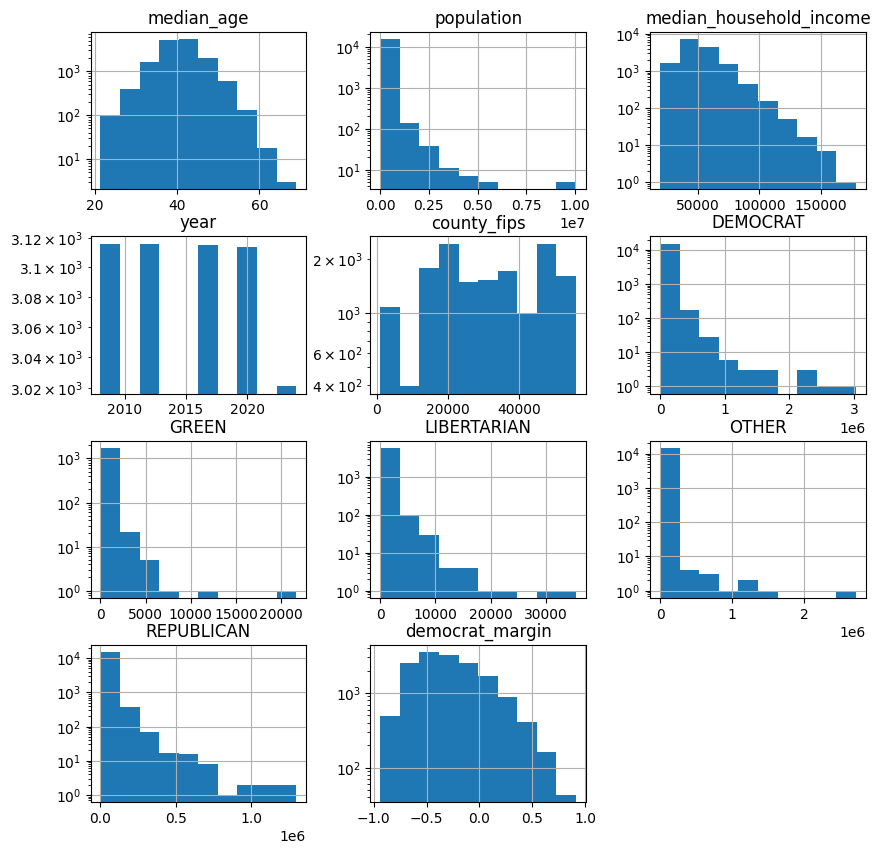

In [9]:
joined = pd.merge(c_df, votes_df)
ax = joined.hist(figsize=(10, 10), log=True)

In [10]:
X = joined[
    [
        "median_age",
        "population",
        "median_household_income",
        "state",
    ]
]
y = joined["democrat_margin"]

joined[X.isna().any(axis=1) | y.isna()]

,NAME,median_age,population,median_household_income,state,county,year,county_fips,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,democrat_margin


In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

ct = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ["state"]),
    remainder=preprocessing.RobustScaler(),
    force_int_remainder_cols=False,
)
p = pipeline.make_pipeline(ct, neural_network.MLPRegressor())
p

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=RobustScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['state'])])),
                ('mlpregressor', MLPRegressor())])

In [12]:
p.fit(X_train, y_train)
y_train_pred = p.predict(X_train)
y_test_pred = p.predict(X_test)

/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-

Training r^2: 0.698701037661694, RMSE: 0.17466904064843505
Testing r^2: 0.6618214687119723, RMSE: 0.18831522645791968


/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/davidli/cmsc320_project/env/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


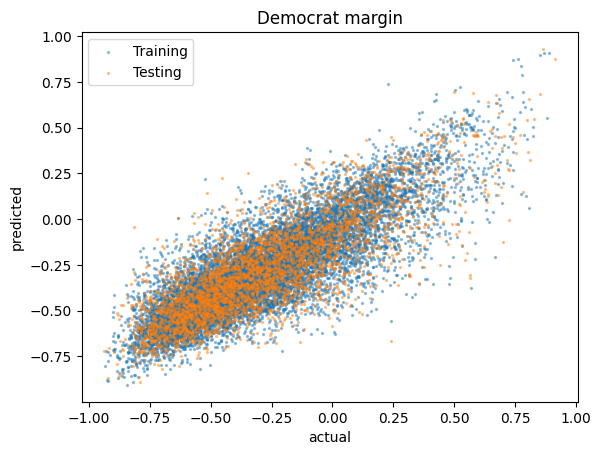

In [13]:
print(
    f"Training r^2: {p.score(X_train, y_train)}, RMSE: {metrics.root_mean_squared_error(y_train, y_train_pred)}"
)
print(
    f"Testing r^2: {p.score(X_test, y_test)}, RMSE: {metrics.root_mean_squared_error(y_test, y_test_pred)}"
)

plt.scatter(y_train, y_train_pred, 2, alpha=0.4, label="Training")
plt.scatter(y_test, y_test_pred, 2, alpha=0.4, label="Testing")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Democrat margin")
plt.legend()